# NASA Nearest Earth Objects Classification Project

This project's goal is to classify Nearest Earth Objects as being hazardous or not. The dataset used is the Kaggle NASA Nearest Earth Objects dataset.

The dataset contains the following columns:
- id: unique identifier for each asteroid
- name: name given by NASA
- est_diameter_min: minimum estimated diameter in kilometres
- est_diameter_max: maximum estimated diameter in kilometres
- relative_velocity: velocity relative to Earth
- miss_distance: distance in kilometres missed
- orbiting_body: planet that the asteroid orbits
- sentry_object: included in sentry (an automated collision monitoring system)
- absolute_magnitude: describes intrinsic luminosity
- hazardous: Boolean feature that shows whether asteroid is harmful or not

## 1. Loading the data

In [ ]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
# Load the dataset
df = pd.read_csv('neo.csv')

## 2. EDA and cleaning

### 2.1 A first look at the data

In [ ]:
# View the first few rows
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
# Statistical summary of numerical columns
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
id,0
name,0
est_diameter_min,0
est_diameter_max,0
relative_velocity,0
miss_distance,0
orbiting_body,0
sentry_object,0
absolute_magnitude,0
hazardous,0


### 2.2 The 'id' column

In [ ]:
# Check unique values in non-numerical columns
df['id'].nunique()

27423

In [ ]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of exact duplicate rows: {duplicate_rows.sum()}")

# Show the exact duplicate rows if any
df[duplicate_rows]


Number of exact duplicate rows: 0


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous


In [ ]:
# Find rows with duplicate 'id'
duplicate_ids = df[df.duplicated(subset=['id'], keep=False)]

# Display rows with duplicate 'id'
print(f"Number of rows with duplicate 'id': {duplicate_ids.shape[0]}")
duplicate_ids.sort_values(by='id').head()  # Show the first few duplicates


Number of rows with duplicate 'id': 79315


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
37651,2000433,433 Eros (A898 PA),23.043847,51.527608,21402.705247,2.672952e+07,Earth,False,10.31,False
56533,2000433,433 Eros (A898 PA),23.043847,51.527608,21761.703426,3.120592e+07,Earth,False,10.31,False
12709,2000433,433 Eros (A898 PA),23.043847,51.527608,15884.252623,5.468808e+07,Earth,False,10.31,False
28226,2001566,1566 Icarus (1949 MA),1.427431,3.191832,120524.290627,6.046638e+07,Earth,False,16.35,True
68073,2001566,1566 Icarus (1949 MA),1.427431,3.191832,108801.296374,8.053782e+06,Earth,False,16.35,True


In [ ]:
# Explore differences in other columns for duplicate ids
# Group by 'id' to compare rows with the same id
duplicate_id_groups = duplicate_ids.groupby('id').agg(lambda x: set(x))

# Show how many unique values are in other columns for each duplicate id
duplicate_id_groups.head(10)


,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
id,,,,,,,,,
2000433,{433 Eros (A898 PA)},{23.0438466577},{51.5276075896},"{21761.7034264303, 21402.705247412, 15884.2526...","{26729521.13507704, 54688077.78293672, 3120591...",{Earth},{False},{10.31},{False}
2001566,{1566 Icarus (1949 MA)},{1.4274305148},{3.1918316641},"{76768.6272477926, 108801.2963741598, 120524.2...","{51882752.851231776, 44427942.84496872, 604663...",{Earth},{False},{16.35},{True}
2001580,{1580 Betulia (1950 KA)},{3.0658787593},{6.8555133165},"{109184.9019317352, 105157.7758512475}","{52686208.19957744, 35573935.508316}",{Earth},{False},{14.69},{False}
2001620,{1620 Geographos (1951 RA)},{2.2727673228},{5.0820622309},"{35077.8890795918, 30602.4443598555, 55020.740...","{18715095.10256244, 39955579.494281255, 205334...",{Earth},{False},{15.34},{True}
2001627,{1627 Ivar (1929 SH)},{7.4568426097},{16.6740069728},"{37802.1917071476, 37629.7564025678}","{42485508.80951597, 48106398.45265009}",{Earth},{False},{12.76},{False}
2001685,{1685 Toro (1948 OA)},{3.602093458},{8.0545258335},"{60803.6095897322, 68742.4471988407, 73133.065...","{29372239.67463952, 49540885.92057275, 3940021...",{Earth},{False},{14.34},{False}
2001862,{1862 Apollo (1932 HA)},{1.5942446807},{3.5648394788},"{69044.8158722974, 60420.9004213795, 84796.486...","{10684536.28614918, 31657761.360431764, 112566...",{Earth},{False},{16.11},{True}
2001864,{1864 Daedalus (1971 FA)},{2.9549829311},{6.6075427063},"{79332.7501160546, 75911.7115970226, 118705.07...","{65057897.65479191, 73944749.24868248, 4056712...",{Earth},{False},{14.77},{False}
2001865,{1865 Cerberus (1971 UA)},{1.1982708007},{2.6794149658},"{65027.6880457748, 46052.6505431713, 55903.444...","{55203008.67110287, 59364481.96197605, 6352211...",{Earth},{False},{16.73},{False}


In [ ]:
# Count the occurrences of each id
id_counts = df['id'].value_counts()

# Show ids that appear more than once
id_counts[id_counts > 1].head(10)


,count
id,
2469219,43
2277810,43
3743123,40
2138175,39
3893865,38
54247854,37
3771633,36
2468910,35
2418849,34


In [ ]:
# Show how many ids appear more than once
len(id_counts[id_counts > 1])

15902

In [ ]:
# Show how many ids appear only once
len(id_counts[id_counts == 1])

11521

In [ ]:
# Investigate a specific id that appears multiple times
example_id = id_counts[id_counts > 1].index[0]  # Picking the first duplicate id
df[df['id'] == example_id]


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
912,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15334.830488,2.105350e+07,Earth,False,24.33,False
2169,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15860.941084,2.297678e+07,Earth,False,24.33,False
3972,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15382.529101,2.032125e+07,Earth,False,24.33,False
5128,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15285.830876,2.345715e+07,Earth,False,24.33,False
6988,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15464.296154,1.954735e+07,Earth,False,24.33,False
8091,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,14629.980565,2.383909e+07,Earth,False,24.33,False
10081,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15445.978808,1.880784e+07,Earth,False,24.33,False
11183,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,13963.527790,2.409758e+07,Earth,False,24.33,False
13252,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15495.759121,1.812412e+07,Earth,False,24.33,False
14401,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,13260.624583,2.424962e+07,Earth,False,24.33,False


### 2.3 Unique values in the other columns

In [ ]:
# Number of unique values in the 'name' column
df['name'].nunique()

27423

In [ ]:
# Number of unique values in the 'orbiting_body' column
df['orbiting_body'].nunique()

1

In [ ]:
# Is it the Earth (it should be)
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [ ]:
# Number of unique values in the 'sentry_object' column
df['sentry_object'].nunique()

1

In [ ]:
# What is it?
df['sentry_object'].unique()

array([False])

### 2.4 How (im)balanced is the data?

In [ ]:
# Get the count of hazardous and non-hazardous objects
hazardous_counts = df['hazardous'].value_counts()

# Calculate the percentages
hazardous_percentages = df['hazardous'].value_counts(normalize=True) * 100

# Print the results
print("Counts of hazardous and non-hazardous objects:")
print(hazardous_counts)

print("\nPercentages of hazardous and non-hazardous objects:")
print(hazardous_percentages)


Counts of hazardous and non-hazardous objects:
hazardous
False    81996
True      8840
Name: count, dtype: int64

Percentages of hazardous and non-hazardous objects:
hazardous
False    90.268176
True      9.731824
Name: proportion, dtype: float64


## 3. Preprocessing

We need to do something about the repeated ids.
For this, we first need to find out <b>why</b> they are repeated.
The only values that are different are:
<ul>
<li>relative velocity</li>
<li>miss distance</li>
</ul>
Is this because their <i>orbits</i> have changed or because there are more than one <i>observations</i>?

In [ ]:
# Group by 'id' and aggregate other columns, keeping relevant info
aggregated_data = df.groupby('id').agg({
    'miss_distance': 'min',  # Aggregate miss_distance
    'relative_velocity': 'max',  # Aggregate relative_velocity
    'name': 'first',  # Retain the first name for each id
    'orbiting_body': 'first',  # Retain the first orbiting_body for each id
    'sentry_object': 'first'  # Retain the first sentry_object for each id
}).reset_index()

In [ ]:
aggregated_data.head()

,id,miss_distance,relative_velocity,name,orbiting_body,sentry_object
0,2000433,2.672952e+07,21402.705247,433 Eros (A898 PA),Earth,False
1,2000719,4.258288e+07,27551.597194,719 Albert (A911 TB),Earth,False
2,2001036,5.372124e+07,51496.923293,1036 Ganymed (A924 UB),Earth,False
3,2001566,4.442794e+07,136986.629106,1566 Icarus (1949 MA),Earth,False
4,2001580,3.557394e+07,105157.775851,1580 Betulia (1950 KA),Earth,False


In [ ]:
# Make 'id' the index explicitly (in case it's not already)
aggregated_data.set_index('id', inplace=True)

# Now 'id' will be the index
print(aggregated_data.head())

         miss_distance  relative_velocity                    name  \
id                                                                  
2000433   2.672952e+07       21402.705247      433 Eros (A898 PA)   
2000719   4.258288e+07       27551.597194    719 Albert (A911 TB)   
2001036   5.372124e+07       51496.923293  1036 Ganymed (A924 UB)   
2001566   4.442794e+07      136986.629106   1566 Icarus (1949 MA)   
2001580   3.557394e+07      105157.775851  1580 Betulia (1950 KA)   

        orbiting_body sentry_object  
id                                   
2000433         Earth         False  
2000719         Earth         False  
2001036         Earth         False  
2001566         Earth         False  
2001580         Earth         False  


## 4. Feature engineering

### 4.1 Dropping columns

In [ ]:
# Drop the specified columns
columns_to_drop = ['orbiting_body', 'sentry_object']
df = df.drop(columns=columns_to_drop)

# Display the remaining columns to confirm they were dropped
print(df.columns)


Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')


In [ ]:
# Create a new column 'est_diameter' as the average of 'est_diameter_min' and 'est_diameter_max'
df['est_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2

# Display the first few rows to confirm the new column
print(df[['est_diameter_min', 'est_diameter_max', 'est_diameter']].head())


   est_diameter_min  est_diameter_max  est_diameter
0          1.198271          2.679415      1.938843
1          0.265800          0.594347      0.430073
2          0.722030          1.614507      1.168268
3          0.096506          0.215794      0.156150
4          0.255009          0.570217      0.412613


In [ ]:
# Drop the 'est_diameter_min' and 'est_diameter_max' columns
df = df.drop(columns=['est_diameter_min', 'est_diameter_max'])

# Display the remaining columns to confirm they were dropped
print(df.columns)


Index(['id', 'name', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous', 'est_diameter'],
      dtype='object')


### 4.2 Log transformation and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation to specified columns
df['miss_distance'] = np.log1p(df['miss_distance'])
df['relative_velocity'] = np.log1p(df['relative_velocity'])
df['est_diameter'] = np.log1p(df['est_diameter'])

print(df.head())


        id                 name  relative_velocity  miss_distance  \
0  2162635  162635 (2000 SS164)           9.515635      17.819926   
1  2277475    277475 (2005 WK4)          11.206261      17.933541   
2  2512244   512244 (2015 YE18)          11.646229      17.723500   
3  3596030          (2012 BV13)          10.117199      17.051636   
4  3667127          (2014 GE35)          10.662861      17.650125   

   absolute_magnitude  hazardous  est_diameter  
0               16.73      False      1.078016  
1               20.00       True      0.357726  
2               17.83      False      0.773929  
3               22.20      False      0.145096  
4               20.09       True      0.345441  


In [ ]:
# Standardize the specified columns
scaler = StandardScaler()
columns_to_standardize = ['miss_distance', 'relative_velocity', 'est_diameter', 'absolute_magnitude']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the first few rows to confirm transformations
print(df[columns_to_standardize].head())

   miss_distance  relative_velocity  est_diameter  absolute_magnitude
0       0.672489          -1.917940      4.381613           -2.348632
1       0.772374           0.991324      0.949122           -1.218735
2       0.587716           1.748431      2.932508           -1.968544
3      -0.002953          -0.882756     -0.064151           -0.458560
4       0.523208           0.056230      0.890580           -1.187637


### 4.3 Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
features = df.drop(columns=['hazardous', 'id', 'name'])  # Replace 'target_column' with the name of your target variable
target = df['hazardous']  # Replace 'target_column' with the actual target variable name

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 1: Save the 'id' and 'name' columns for both train and test sets
id_train = df.loc[X_train.index, 'id']
name_train = df.loc[X_train.index, 'name']
id_test = df.loc[X_test.index, 'id']
name_test = df.loc[X_test.index, 'name']

# Check the sizes of the resulting splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 21938 samples
Testing set size: 5485 samples


## 5. Predictive modelling

### 5.1 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation Metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))



Logistic Regression:
Accuracy: 0.9096213121972699
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     16439
        True       0.65      0.11      0.19      1729

    accuracy                           0.91     18168
   macro avg       0.78      0.55      0.57     18168
weighted avg       0.89      0.91      0.88     18168

Confusion Matrix:
 [[16336   103]
 [ 1539   190]]


In [ ]:
# Step 5: Add the 'id' and 'name' columns back to the train and test sets
X_train['id'] = id_train
X_train['name'] = name_train
X_test['id'] = id_test
X_test['name'] = name_test

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred_log_reg)

# Display the F1 score
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.1879


### 5.2 Decision trees

In [ ]:
# Initialize model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree Classifier
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree:
Accuracy: 0.8916226332012329
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     16439
        True       0.44      0.47      0.45      1729

    accuracy                           0.89     18168
   macro avg       0.69      0.70      0.70     18168
weighted avg       0.90      0.89      0.89     18168

Confusion Matrix:
 [[15379  1060]
 [  909   820]]


In [ ]:
# Calculate F1 score
f1_tree = f1_score(y_test, y_pred_tree)

# Display the F1 score
print(f"F1 Score: {f1_tree:.4f}")

F1 Score: 0.4544


## 6. Decision tree - no scaling or log transformation

In [ ]:
# Group by 'id' and aggregate other columns, keeping relevant info
df = df.groupby('id').agg({
    'name': 'first',  # Retain the first name for each id
    'est_diameter_min': 'first',
    'est_diameter_max': 'first',
    'relative_velocity': 'max',  # Aggregate relative_velocity
    'miss_distance': 'min',  # Aggregate miss_distance
    'orbiting_body': 'first',  # Retain the first orbiting_body for each id
    'sentry_object': 'first',  # Retain the first sentry_object for each id
    'absolute_magnitude': 'first',
    'hazardous': 'first'
}).reset_index()

In [ ]:
df.head()

,id,miss_distance,relative_velocity,name,orbiting_body,sentry_object
0,2000433,2.672952e+07,21761.703426,433 Eros (A898 PA),Earth,False
1,2000719,4.258288e+07,27551.597194,719 Albert (A911 TB),Earth,False
2,2001036,5.372124e+07,51496.923293,1036 Ganymed (A924 UB),Earth,False
3,2001566,8.053782e+06,136986.629106,1566 Icarus (1949 MA),Earth,False
4,2001580,3.557394e+07,109184.901932,1580 Betulia (1950 KA),Earth,False


In [ ]:
# Drop the specified columns
columns_to_drop = ['orbiting_body', 'sentry_object']
df = df.drop(columns=columns_to_drop)

# Display the remaining columns to confirm they were dropped
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')


In [ ]:
# Create a new column 'est_diameter' as the average of 'est_diameter_min' and 'est_diameter_max'
df['est_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2

# Display the first few rows to confirm the new column
print(df[['est_diameter_min', 'est_diameter_max', 'est_diameter']].head())

   est_diameter_min  est_diameter_max  est_diameter
0         23.043847         51.527608     37.285727
1          2.044349          4.571303      3.307826
2         37.892650         84.730541     61.311595
3          1.427431          3.191832      2.309631
4          3.065879          6.855513      4.960696


In [ ]:
# Drop the 'est_diameter_min' and 'est_diameter_max' columns
df = df.drop(columns=['est_diameter_min', 'est_diameter_max'])

# Display the remaining columns to confirm they were dropped
print(df.columns)

Index(['id', 'name', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous', 'est_diameter'],
      dtype='object')


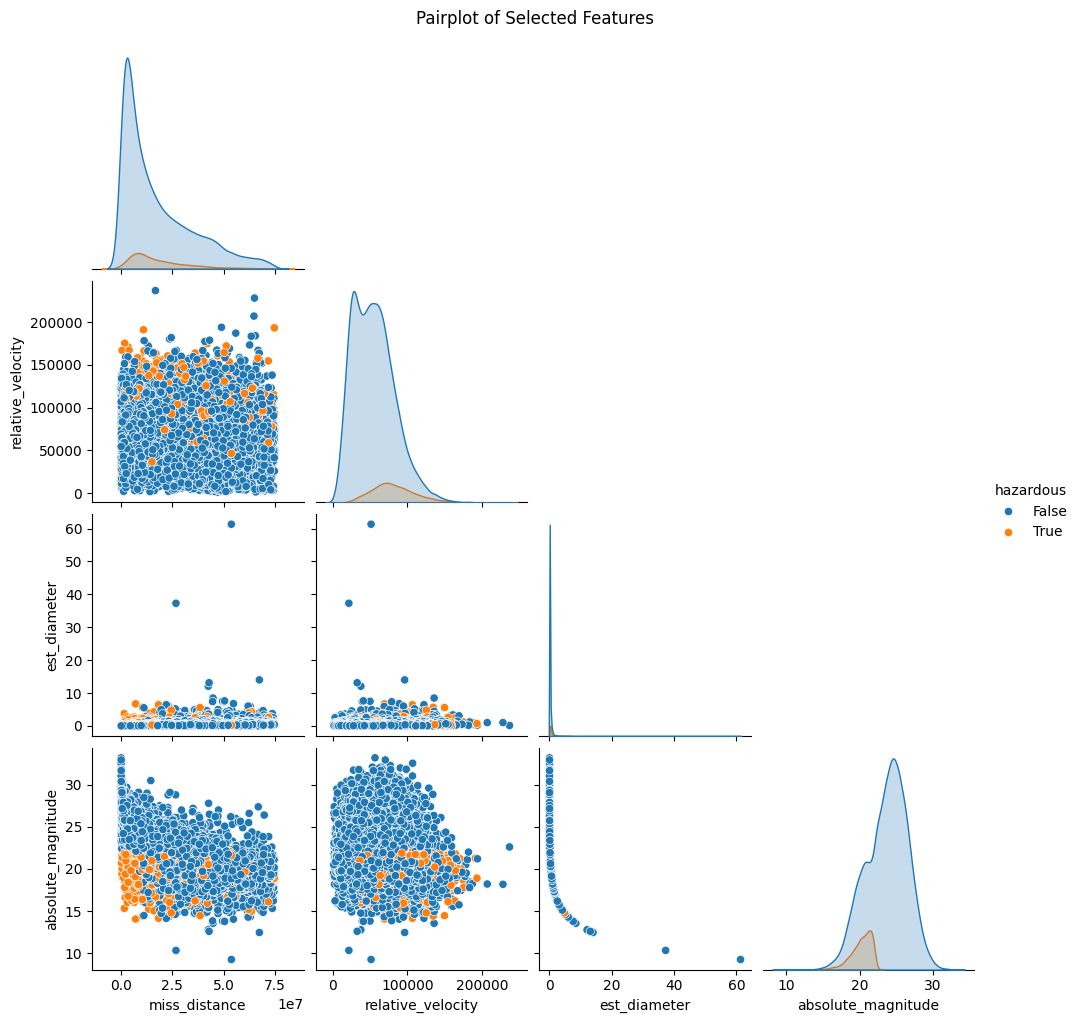

In [ ]:
# Select a subset of columns for the pairplot to avoid overcrowding
columns_for_pairplot = ['miss_distance', 'relative_velocity', 'est_diameter', 'absolute_magnitude', 'hazardous']

# Check if all the selected columns are in the dataset
columns_to_plot = [col for col in columns_for_pairplot if col in df.columns]

# Create the pairplot
sns.pairplot(df[columns_to_plot], hue='hazardous', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
features = df.drop(columns=['hazardous', 'id', 'name'])  # Replace 'target_column' with the name of your target variable
target = df['hazardous']  # Replace 'target_column' with the actual target variable name

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 1: Save the 'id' and 'name' columns for both train and test sets
id_train = df.loc[X_train.index, 'id']
name_train = df.loc[X_train.index, 'name']
id_test = df.loc[X_test.index, 'id']
name_test = df.loc[X_test.index, 'name']

# Check the sizes of the resulting splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 21938 samples
Testing set size: 5485 samples


In [ ]:
# Initialize model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree Classifier
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree:
Accuracy: 0.9239744758432088
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      5042
        True       0.53      0.54      0.53       443

    accuracy                           0.92      5485
   macro avg       0.74      0.75      0.75      5485
weighted avg       0.92      0.92      0.92      5485

Confusion Matrix:
 [[4829  213]
 [ 204  239]]


In [ ]:
# Calculate F1 score
f1_tree = f1_score(y_test, y_pred_tree)

# Display the F1 score
print(f"F1 Score: {f1_tree:.4f}")

F1 Score: 0.5341


### 6.2 Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Set up the grid search with 'f1' scoring
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 score
    cv=5,          # 5-fold cross-validation
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.5602579873999703


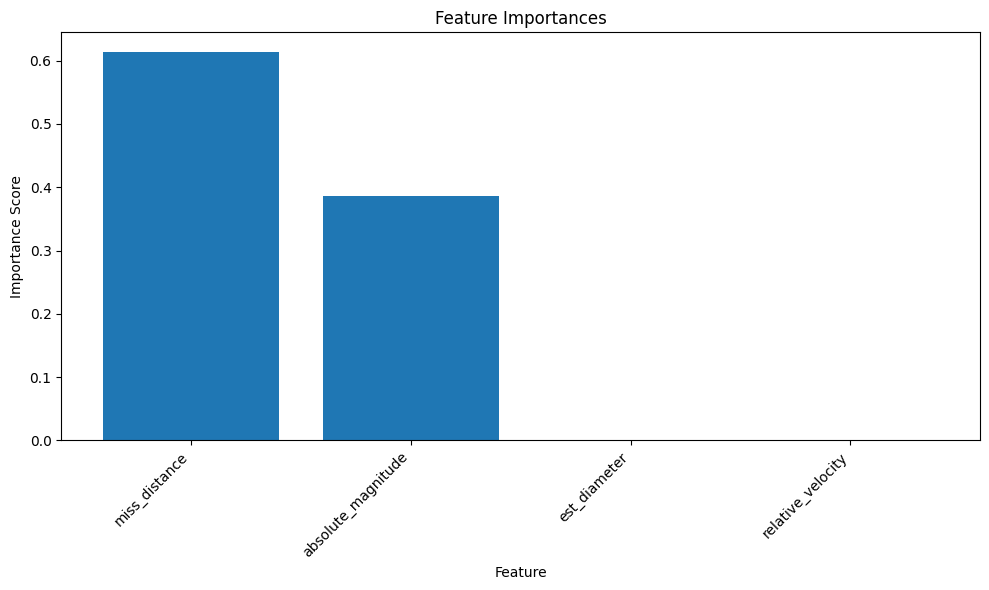

miss_distance: 0.6141
absolute_magnitude: 0.3859
est_diameter: 0.0000
relative_velocity: 0.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train the Decision Tree using the best parameters from GridSearchCV
best_tree = grid_search.best_estimator_

# Get feature importances
feature_importances = best_tree.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha='right')
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Display feature importance values alongside names
for i in indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print("Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Performance:
Accuracy: 0.9444
Precision: 0.8000
Recall: 0.4153
F1 Score: 0.5468

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97      5042
        True       0.80      0.42      0.55       443

    accuracy                           0.94      5485
   macro avg       0.88      0.70      0.76      5485
weighted avg       0.94      0.94      0.94      5485



### 6.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9402
Precision: 0.6962
Recall: 0.4605
F1 Score: 0.5543

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.97      5042
        True       0.70      0.46      0.55       443

    accuracy                           0.94      5485
   macro avg       0.83      0.72      0.76      5485
weighted avg       0.93      0.94      0.93      5485



### 6.4 Remove unimportant features

In [ ]:
# Drop the 'est_diameter' and 'relative_velocity' columns
df = df.drop(columns=['est_diameter', 'relative_velocity'])

# Display the first few rows and updated columns
print(df.head())
print(df.columns)


        id                    name  miss_distance  absolute_magnitude  \
0  2000433      433 Eros (A898 PA)   2.672952e+07               10.31   
1  2000719    719 Albert (A911 TB)   4.258288e+07               15.57   
2  2001036  1036 Ganymed (A924 UB)   5.372124e+07                9.23   
3  2001566   1566 Icarus (1949 MA)   8.053782e+06               16.35   
4  2001580  1580 Betulia (1950 KA)   3.557394e+07               14.69   

   hazardous  
0      False  
1      False  
2      False  
3       True  
4      False  
Index(['id', 'name', 'miss_distance', 'absolute_magnitude', 'hazardous'], dtype='object')
